## Get Dataset

In [30]:
%matplotlib inline
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Data Directory Analysis

In [31]:
# Get File Names and Categories and Data Amount
# File exploration
import os
import re
import numpy as np
from collections import defaultdict

def analyze_directory(path):
    file_pattern = re.compile(r"^(.*?)(\d{5})\..+$")  # captures category and 5-digit number
    category_files = defaultdict(list)

    for filename in os.listdir(path):
        match = file_pattern.match(filename)
        if match:
            category, number_str = match.groups()
            category_files[category].append((filename, int(number_str)))

    # Print summary of categories
    for category, files in category_files.items():
        numbers = [num for _, num in files]
        print(f"Category: {category}")
        print(f"  Number of files: {len(files)}")
        print(f"  Number range: {min(numbers)} to {max(numbers)}")

    print("\nInspecting one file per category:")
    for category, files in category_files.items():
        sample_file = next(f for f in files if f[0].endswith('.npz'))[0]
        filepath = os.path.join(path, sample_file)
        print(f"\nSample file for category '{category}': {sample_file}")
        try:
            data = np.load(filepath)
            for key in data:
                print(f"  Key: {key}, Shape: {data[key].shape}")
        except Exception as e:
            print(f"  Could not load file '{sample_file}': {e}")

# Example usage:
analyze_directory("../dexnet_2.1/dexnet_2.1_eps_10/tensors")


Category: camera_poses_
  Number of files: 17
  Number range: 0 to 16
Category: hand_poses_
  Number of files: 17
  Number range: 0 to 16
Category: depth_ims_tf_table_
  Number of files: 17
  Number range: 0 to 16
Category: labels_
  Number of files: 17
  Number range: 0 to 16
Category: traj_ids_
  Number of files: 17
  Number range: 0 to 16
Category: grasp_metrics_
  Number of files: 17
  Number range: 0 to 16
Category: camera_intrs_
  Number of files: 17
  Number range: 0 to 16
Category: grasped_obj_keys_
  Number of files: 17
  Number range: 0 to 16
Category: grasp_collision_metrics_
  Number of files: 17
  Number range: 0 to 16
Category: pile_ids_
  Number of files: 17
  Number range: 0 to 16

Inspecting one file per category:

Sample file for category 'camera_poses_': camera_poses_00014.npz
  Key: arr_0, Shape: (1000, 7)

Sample file for category 'hand_poses_': hand_poses_00012.npz
  Key: arr_0, Shape: (1000, 6)

Sample file for category 'depth_ims_tf_table_': depth_ims_tf_table_0

Selected file number: 00003, sample index: 35

camera_poses_00003 -> Example[35]: [-0.052724    0.99808383 -0.03233922  0.00173562 -0.00515223 -0.07879223
  0.7452768 ]

hand_poses_00003 -> Example[35]: [ 3.6500000e+02  3.0700000e+02  7.3406798e-01  1.9367012e+00
 -1.8319638e-02  3.6000000e+01]



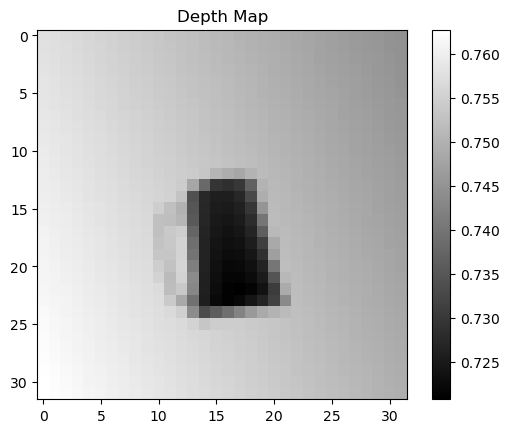

labels_00003 -> Example[35]: 1

traj_ids_00003 -> Example[35]: 1876



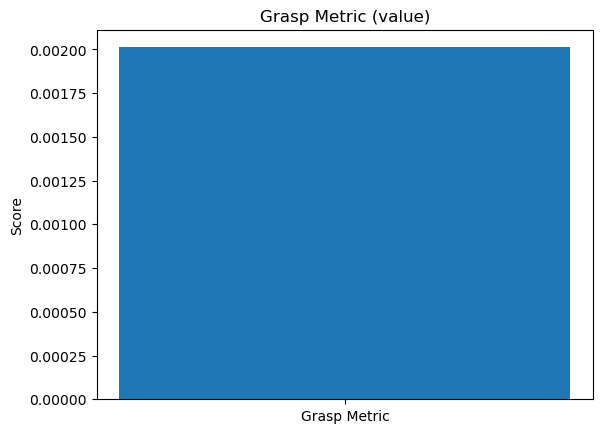

camera_intrs_00003 -> Example[35]: [526.7417 526.7417 299.     299.    ]

grasped_obj_keys_00003 -> Example[35]: b'9737c77d3263062b8ca7a0a01bcd55b6'

grasp_collision_metrics_00003 -> Example[35]: 0.0020118835382163525

pile_ids_00003 -> Example[35]: 1446



In [32]:
import os
import numpy as np
import matplotlib.pyplot as plt
import random

# Define all categories and their shape descriptions
categories = {
    'camera_poses_': (1000, 7),
    'hand_poses_': (1000, 6),
    'depth_ims_tf_table_': (466, 32, 32, 1),
    'labels_': (1000,),
    'traj_ids_': (1000,),
    'grasp_metrics_': (1000,),
    'camera_intrs_': (1000, 4),
    'grasped_obj_keys_': (1000,),
    'grasp_collision_metrics_': (1000,),
    'pile_ids_': (1000,)
}

def load_file(path, category, file_num):
    fname = f"{category}{file_num:05d}.npz"
    fpath = os.path.join(path, fname)
    return np.load(fpath)['arr_0']

def find_common_file_numbers(path):
    files = os.listdir(path)
    category_to_nums = {cat: set() for cat in categories}
    for fname in files:
        for cat in categories:
            if fname.startswith(cat) and fname.endswith('.npz'):
                try:
                    num = int(fname[len(cat):-4])
                    category_to_nums[cat].add(num)
                except:
                    continue
    # Find intersection of all sets
    common_nums = set.intersection(*category_to_nums.values())
    return sorted(list(common_nums))

def visualize_random_example(path):
    common_files = find_common_file_numbers(path)
    if not common_files:
        print("No common file numbers found across all categories.")
        return

    chosen_file_num = random.choice(common_files)

    # Load a sample file to determine valid index range
    depth_map = load_file(path, 'depth_ims_tf_table_', chosen_file_num)
    max_index = depth_map.shape[0]  # Likely 466
    chosen_index = random.randint(0, max_index - 1)

    print(f"Selected file number: {chosen_file_num:05d}, sample index: {chosen_index}\n")

    # Store and print/plot each category
    for category in categories:
        data = load_file(path, category, chosen_file_num)

        if category == 'depth_ims_tf_table_':
            image = data[chosen_index].squeeze()
            plt.figure()
            plt.title("Depth Map")
            plt.imshow(image, cmap='gray')
            plt.colorbar()
            plt.show()

        elif category == 'grasp_metrics_':
            plt.figure()
            plt.title("Grasp Metric (value)")
            plt.bar([0], [data[chosen_index]])
            plt.xticks([0], ['Grasp Metric'])
            plt.ylabel('Score')
            plt.show()

        else:
            print(f"{category}{chosen_file_num:05d} -> Example[{chosen_index}]: {data[chosen_index]}\n")

# Example usage
# Replace this path with the actual path to your data folder
visualize_random_example("../dexnet_2.1/dexnet_2.1_eps_10/tensors")


In [33]:
# cd scripts/
# ./download_dexnet_2.sh


In [34]:
# dataset['image']['depth_ims']     # Shape: (N, 32, 32)   — depth image
# dataset['pose']                   # Shape: (N, 4)        — grasp pose (x, y, z, angle)
# dataset['success']                # Shape: (N,)          — binary label: success/failure


In [35]:
"""
For tensorfloaw dataset
"""
# import torch
# from torch.utils.data import Dataset
# import h5py
# import numpy as np

# class DexNetDataset(Dataset):
#     def __init__(self, h5_path):
#         self.data = h5py.File(h5_path, 'r')
#         self.depth_images = self.data['image']['depth_ims'][:]
#         self.labels = self.data['grasp_qualities'][:]  # or 'success', depending on file

#     def __len__(self):
#         return len(self.depth_images)

#     def __getitem__(self, idx):
#         img = self.depth_images[idx]
#         img = np.expand_dims(img, axis=0)  # Convert to (1, H, W) for PyTorch CNN
#         label = self.labels[idx]
#         return torch.tensor(img, dtype=torch.float32), torch.tensor(label, dtype=torch.float32)


# from torch.utils.data import DataLoader

# dataset = DexNetDataset('path/to/dexnet_dataset.h5')
# dataloader = DataLoader(dataset, batch_size=32, shuffle=True)


'\nFor tensorfloaw dataset\n'

In [36]:
from customize_dataset import DexNetNPZDataset
from torch.utils.data import DataLoader

dataset = DexNetNPZDataset('../dexnet_2.1/dexnet_2.1_eps_10/tensors/')
dataloader = DataLoader(dataset, batch_size=16, shuffle=True, num_workers=4)

In [37]:
# Load dataset with regression labels and full 6D poses
from customize_dataset import DexNetNPZDatasetAll
from torch.utils.data import DataLoader
dataset = DexNetNPZDatasetAll(tensor_dir='../dexnet_2.1/dexnet_2.1_eps_10/tensors/', use_regression=True, pose_dims=[0, 1, 2, 3, 4, 5])
img, pose, label = dataset[0]
print(img.shape)    # torch.Size([3, 32, 32])
print(pose.shape)   # torch.Size([6])
print(label)        # A float (grasp quality)

dataloader = DataLoader(dataset, batch_size=16, shuffle=True, num_workers=4)


torch.Size([1, 32, 32])
torch.Size([6])
tensor(0.0021)


In [38]:
for i in dataloader:
    print(i[0].shape, i[1])
    break


torch.Size([16, 1, 32, 32]) tensor([[ 3.2600e+02,  3.1700e+02,  7.1825e-01,  2.0408e+00, -8.6305e-03,
          3.7000e+01],
        [ 3.2000e+02,  2.0000e+02,  6.1844e-01,  2.2721e+00,  4.0066e-02,
          4.2000e+01],
        [ 3.5200e+02,  2.5600e+02,  6.4457e-01,  5.1078e+00, -4.4143e-02,
          4.1000e+01],
        [ 2.2100e+02,  2.4700e+02,  6.4439e-01,  2.7675e-01,  2.7444e-02,
          4.1000e+01],
        [ 2.9800e+02,  2.9300e+02,  7.2989e-01,  6.0726e+00, -4.3800e-02,
          3.6000e+01],
        [ 2.8300e+02,  2.8500e+02,  7.0940e-01,  5.5311e+00, -3.2160e-02,
          3.7000e+01],
        [ 2.7300e+02,  2.1400e+02,  7.1211e-01,  5.2950e+00, -9.0588e-03,
          3.7000e+01],
        [ 2.9000e+02,  1.5200e+02,  7.2777e-01,  4.0705e+00, -4.6189e-02,
          3.6000e+01],
        [ 2.4400e+02,  3.9100e+02,  6.4443e-01,  3.7851e+00,  4.7185e-02,
          4.1000e+01],
        [ 2.5900e+02,  3.3400e+02,  6.9647e-01,  5.5637e+00, -1.5067e-02,
          3.8000e+01],
  

In [39]:
i[0].shape

torch.Size([16, 1, 32, 32])

## Image Model

In [68]:
import torch.nn as nn
import torch.nn.functional as F

class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, 3)
        self.pool = nn.MaxPool2d(2)
        self.conv2 = nn.Conv2d(16, 32, 3)
        self.fc1 = nn.Linear(32 * 6 * 6, 64)
        self.fc2 = nn.Linear(64, 1)  # Binary classification (grasp success)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))  # (B, 16, 15, 15)
        x = self.pool(F.relu(self.conv2(x)))  # (B, 32, 6, 6)
        x = x.view(-1, 32 * 6 * 6)
        x = F.relu(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))
        return x


In [4]:
import torch
import torch.nn as nn
from torchvision.models import resnet50, ResNet50_Weights

class ResNetGraspNet(nn.Module):
    """
    A binary classification model for grasp success using ResNet-50 as a backbone.
    """
    def __init__(self, pretrained: bool = True, num_classes: int = 1, dropout_rate: float = 0.2):
        super(ResNetGraspNet, self).__init__()
        # Load ResNet-50 backbone with optional ImageNet pretrained weights
        weights = ResNet50_Weights.IMAGENET1K_V2 if pretrained else None
        self.backbone = resnet50(weights=weights)
        # Retrieve number of input features to the classifier head
        in_features = self.backbone.fc.in_features
        # Replace the original classification head
        self.backbone.fc = nn.Sequential(
            nn.Dropout(dropout_rate, inplace=True),
            nn.Linear(in_features, num_classes),
            nn.Sigmoid()
        )

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        # Forward pass through ResNet-50 and sigmoid head
        return self.backbone(x)

In [17]:
import torch
import torch.nn as nn
from torchvision.models import efficientnet_v2_s, EfficientNet_V2_S_Weights

class EfficientNetV2GraspNet(nn.Module):
    """
    A binary classification model for grasp success using EfficientNet-V2-S as a backbone.
    """
    def __init__(self, pretrained: bool = True, num_classes: int = 1, dropout_rate: float = 0.2):
        super(EfficientNetV2GraspNet, self).__init__()
        # Load EfficientNet-V2-S backbone with optional ImageNet pretrained weights
        weights = EfficientNet_V2_S_Weights.IMAGENET1K_V1 if pretrained else None
        self.backbone = efficientnet_v2_s(weights=weights)
        # Retrieve number of input features to the classifier head
        in_features = self.backbone.classifier[1].in_features
        # Replace the classifier head for binary grasp success prediction
        self.backbone.classifier = nn.Sequential(
            nn.Dropout(dropout_rate, inplace=True),
            nn.Linear(in_features, num_classes),
            nn.Sigmoid()
        )

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        # Forward pass through EfficientNet-V2 and sigmoid head
        return self.backbone(x)

### Forward Pass and Evaluation Measurements Define

In [18]:
dataloader

### Model Training

In [19]:
for i in model.parameters():
    print(i.shape)

In [20]:
# model = SimpleCNN()
model = EfficientNetV2GraspNet()
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

from tqdm import tqdm
for epoch in range(3):
    for imgs, labels in tqdm(dataloader):
        outputs = model(imgs)
        loss = criterion(outputs.squeeze(), labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        break


Downloading: "https://download.pytorch.org/models/efficientnet_v2_s-dd5fe13b.pth" to /Users/xuzhezhi/.cache/torch/hub/checkpoints/efficientnet_v2_s-dd5fe13b.pth
100%|██████████| 82.7M/82.7M [00:05<00:00, 14.8MB/s]
  0%|          | 0/1030 [00:00<?, ?it/s]


KeyboardInterrupt: 

In [21]:
import torch
from tqdm import tqdm

num_epochs = 3
loss_history = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    progress_bar = tqdm(dataloader, desc=f"Epoch {epoch+1}/{num_epochs}")
    
    for imgs, labels in progress_bar:
        outputs = model(imgs).squeeze()
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Accumulate metrics
        running_loss += loss.item() * imgs.size(0)

        # Optional: compute accuracy
        predicted = (outputs >= 0.5).float()
        correct += (predicted == labels).sum().item()
        total += labels.size(0)
        break

    epoch_loss = running_loss / total
    accuracy = correct / total

    loss_history.append(epoch_loss)

    print(f"Epoch [{epoch+1}/{num_epochs}] — Loss: {epoch_loss:.4f} — Accuracy: {accuracy:.4f}")


Epoch 1/3:   0%|          | 0/1030 [00:31<?, ?it/s]


Epoch [1/3] — Loss: 0.6727 — Accuracy: 0.5000


Epoch 2/3:   0%|          | 0/1030 [00:39<?, ?it/s]


Epoch [2/3] — Loss: 0.8261 — Accuracy: 0.5000


Epoch 3/3:   0%|          | 0/1030 [00:42<?, ?it/s]

Epoch [3/3] — Loss: 0.7155 — Accuracy: 0.6250


In [1]:
import matplotlib.pyplot as plt

plt.plot(loss_history, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss per Epoch')
plt.grid(True)
plt.show()


NameError: name 'loss_history' is not defined

## Image + Poses Model

In [40]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class SimpleGQCNN(nn.Module):
    def __init__(self, pose_dim=4, output_type='binary'):
        """
        pose_dim: number of dimensions in the pose vector (e.g., x, y, z, theta)
        output_type: 'binary' or 'regression'
        """
        super(SimpleGQCNN, self).__init__()
        self.output_type = output_type

        # Image stream
        self.conv1 = nn.Conv2d(1, 16, 3)           # -> (B, 16, 30, 30)
        self.pool = nn.MaxPool2d(2, 2)             # -> (B, 16, 15, 15)
        self.conv2 = nn.Conv2d(16, 32, 3)          # -> (B, 32, 13, 13) -> pool -> (B, 32, 6, 6)
        self.im_fc = nn.Linear(32 * 6 * 6, 64)

        # Pose stream
        self.pose_fc1 = nn.Linear(pose_dim, 32)
        self.pose_fc2 = nn.Linear(32, 32)

        # Merge stream
        self.merge_fc1 = nn.Linear(64 + 32, 64)
        self.merge_fc2 = nn.Linear(64, 1)  # Single output for binary or regression

    def forward(self, image, pose):
        # Image stream
        x = self.pool(F.relu(self.conv1(image)))  # -> (B, 16, 15, 15)
        x = self.pool(F.relu(self.conv2(x)))      # -> (B, 32, 6, 6)
        x = x.view(x.size(0), -1)                 # Flatten
        x = F.relu(self.im_fc(x))                 # -> (B, 64)

        # Pose stream
        p = F.relu(self.pose_fc1(pose))           # -> (B, 32)
        p = F.relu(self.pose_fc2(p))              # -> (B, 32)

        # Merge
        combined = torch.cat((x, p), dim=1)       # -> (B, 96)
        out = F.relu(self.merge_fc1(combined))    # -> (B, 64)
        out = self.merge_fc2(out)                 # -> (B, 1)

        if self.output_type == 'binary':
            out = torch.sigmoid(out)              # Binary classification
        return out


In [47]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class SimpleGQCNN(nn.Module):
    def __init__(self, pose_dim=4, output_type='binary'):
        """
        pose_dim: number of dimensions in the pose vector (e.g., x, y, z, theta)
        output_type: 'binary' or 'regression'
        """
        super(SimpleGQCNN, self).__init__()
        self.output_type = output_type

        # Image stream
        self.conv1 = nn.Conv2d(1, 16, 3)           # → (B, 16, 30, 30)
        self.pool = nn.MaxPool2d(2, 2)             # → (B, 16, 15, 15)
        self.conv2 = nn.Conv2d(16, 32, 3)          # → (B, 32, 13, 13) → pool → (B, 32, 6, 6)
        self.im_fc = nn.Linear(32 * 6 * 6, 64)     # → (B, 64)

        # Pose stream
        self.pose_fc1 = nn.Linear(pose_dim, 64)
        self.pose_fc2 = nn.Linear(64, 64)

        # Merge stream after elementwise multiplication
        self.merge_fc1 = nn.Linear(64, 32)
        self.merge_fc2 = nn.Linear(32, 1)

    def forward(self, image, pose):
        # Image stream
        x = self.pool(F.relu(self.conv1(image)))   # (B, 16, 15, 15)
        x = self.pool(F.relu(self.conv2(x)))       # (B, 32, 6, 6)
        x = x.view(x.size(0), -1)                  # Flatten
        x = F.relu(self.im_fc(x))                  # (B, 64)

        # Pose stream
        p = F.relu(self.pose_fc1(pose))            # (B, 64)
        p = F.relu(self.pose_fc2(p))               # (B, 64)

        # Element-wise multiplication
        combined = x * p                           # (B, 64)

        # Final layers
        out = F.relu(self.merge_fc1(combined))     # (B, 32)
        out = self.merge_fc2(out)                  # (B, 1)

        if self.output_type == 'binary':
            out = torch.sigmoid(out)               # Binary prediction
        return out


In [48]:
model = SimpleGQCNN(pose_dim=4, output_type='regression')  # or 'binary'

image = torch.randn(8, 1, 32, 32)  # Batch of 8 grayscale images
pose = torch.randn(8, 4)          # Corresponding batch of 4D poses

output = model(image, pose)
print(output.shape)  # torch.Size([8, 1])


torch.Size([8, 1])


In [49]:
import torch.optim as optim
from tqdm import tqdm
# Set config
tensor_dir = '../dexnet_2.1/dexnet_2.1_eps_10/tensors/'  # replace with actual path
batch_size = 32
use_regression = False  # or True
pose_dims = [2]          # or full [0, 1, 2, 3, 4, 5]

# Create dataset and dataloader
dataset = DexNetNPZDatasetAll(tensor_dir=tensor_dir, use_regression=use_regression, pose_dims=pose_dims)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

model = SimpleGQCNN(pose_dim=len(pose_dims), output_type='regression' if use_regression else 'binary')
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

if use_regression:
    criterion = nn.MSELoss()
else:
    criterion = nn.BCELoss()

optimizer = optim.Adam(model.parameters(), lr=1e-4)


In [52]:
def train(model, dataloader, criterion, optimizer, num_epochs=10):
    model.train()
    
    # 🔍 Compute initial loss (before training)
    with torch.no_grad():
        init_loss = 0.0
        for images, poses, labels in dataloader:
            images = images.to(device)
            poses = poses.to(device)
            labels = labels.to(device).unsqueeze(1)  # (B, 1)

            outputs = model(images, poses)
            loss = criterion(outputs, labels)
            init_loss += loss.item()
        init_loss /= len(dataloader)
        print(f"Initial Loss (Before Training): {init_loss:.4f}")

    # 🔁 Training Loop
    for epoch in range(num_epochs):
        running_loss = 0.0
        i=0
        for images, poses, labels in tqdm(dataloader, desc=f"Epoch {epoch+1}/{num_epochs}"):
            images = images.to(device)
            poses = poses.to(device)
            labels = labels.to(device).unsqueeze(1)

            optimizer.zero_grad()
            outputs = model(images, poses)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            

            running_loss += loss.item()

        avg_loss = running_loss / len(dataloader)
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}")


In [ ]:
train(model, dataloader, criterion, optimizer, num_epochs=10)

Initial Loss (Before Training): 0.7476


Epoch 1/10:  39%|███▉      | 201/515 [03:00<04:52,  1.07it/s]